In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from a reputable data source
data_source_url = 'https://raw.githubusercontent.com/Hanon2/intro_to_ml/main/HW1.csv'
dataset = pd.read_csv(data_source_url)

# Define a gradient descent function using a professional approach
def perform_gradient_descent(X, Y, learning_rate, iterations):
    """
    Perform gradient descent.

    Args:
    - X (array-like): Variables X1, X2, X3
    - Y (array-like): output
    - learning_rate (float): Step size for gradient descent.
    - iterations (int): Number of iterations for gradient descent.

    Returns:
    - intercept (float): Intercept parameter of the linear regression.
    - slope (float): Slope parameter of the linear regression.
    - loss_history (list): List of loss values over iterations.
    """
    num_samples = len(Y)
    intercept = 0
    slope = 0
    loss_history = []
    
    # Gradient descent loop
    for _ in range(iterations):
        predictions = intercept + slope * X
        loss = np.mean(np.square(predictions - Y))
        loss_history.append(loss)
        
        # Compute gradients
        gradient_intercept = np.mean(predictions - Y)
        gradient_slope = np.mean((predictions - Y) * X)
        
        # Update parameters
        intercept -= learning_rate * gradient_intercept
        slope -= learning_rate * gradient_slope
        
    return intercept, slope, loss_history

# Parameters for gradient descent and plotting
learning_rates = [0.01, 0.05, 0.1]
iterations = 1500

# Plotting function with professional visualization
def plot_regression(X, Y, intercept, slope, loss_history, variable_name):
    """
    Plot the regression line and loss history.

    Args:
    - X (array-like): Independent variable data.
    - Y (array-like): Dependent variable data.
    - intercept (float): Intercept parameter of the linear regression.
    - slope (float): Slope parameter of the linear regression.
    - loss_history (list): List of loss values over iterations.
    - variable_name (str): Name of the independent variable.

    Returns:
    - None
    """
    plt.figure(figsize=(12, 5))
    
    # Plot regression line
    plt.subplot(1, 2, 1)
    plt.grid(True)
    plt.scatter(X, Y, color='blue', label='Data points')
    plt.plot(X, intercept + slope * X, color='red', label='Fitted line')
    plt.title(f'Regression Line for {variable_name}')
    plt.xlabel(variable_name)
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    
    # Plot loss over iterations
    plt.subplot(1, 2, 2)
    plt.grid(True)
    plt.plot(range(len(loss_history)), loss_history, color='green')
    plt.title(f'Loss over Iterations for {variable_name}')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.tight_layout()
    plt.show()

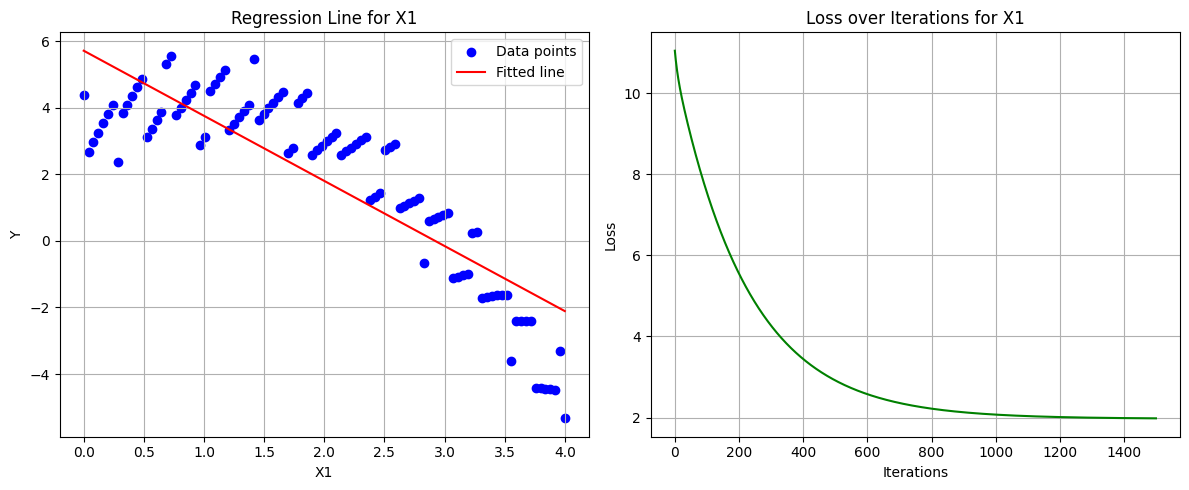

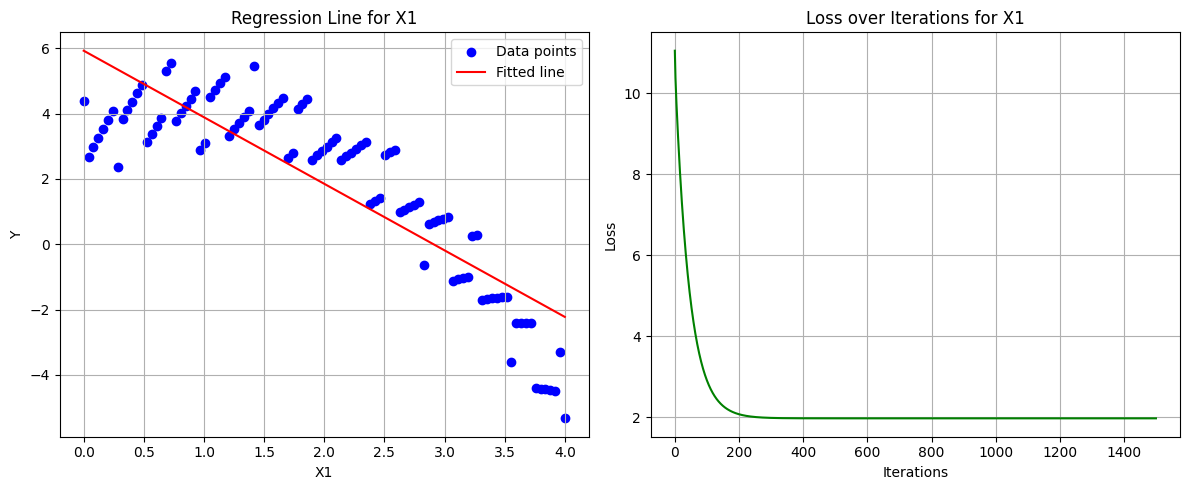

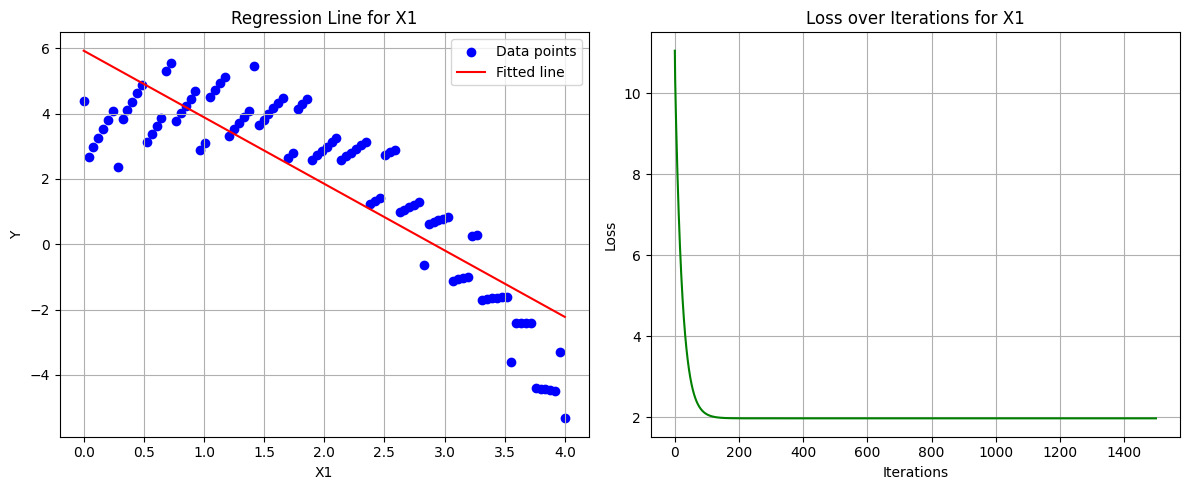

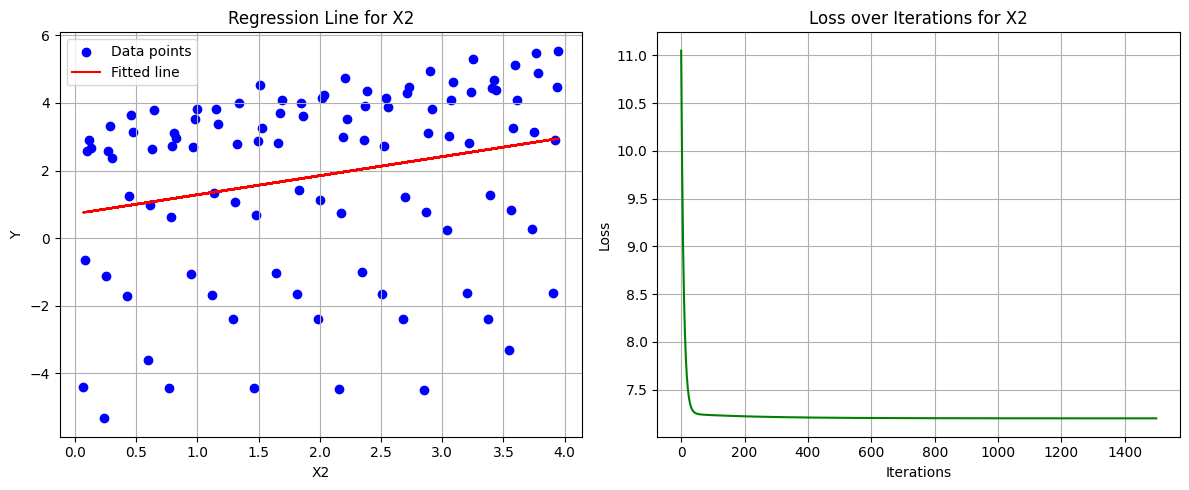

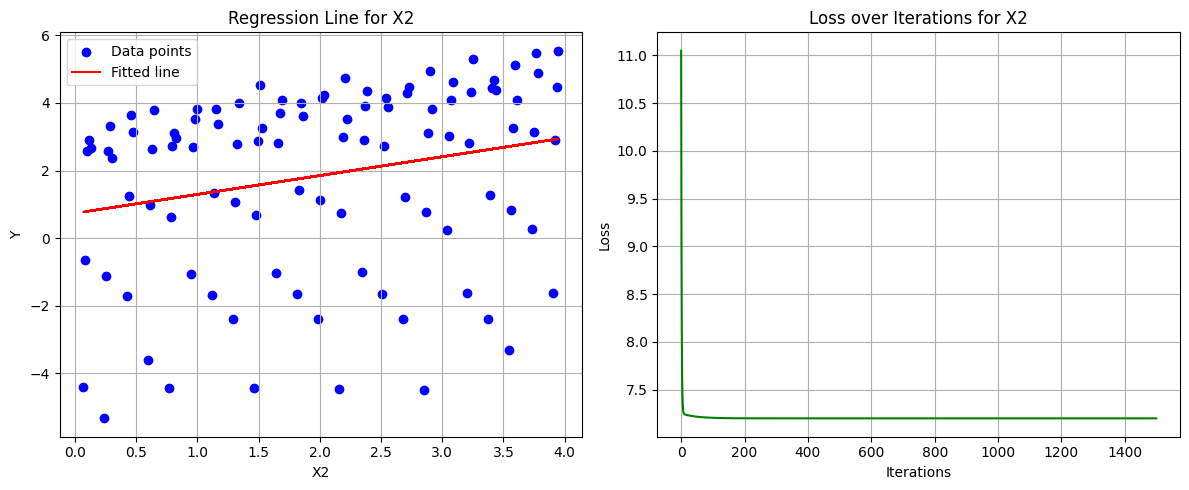

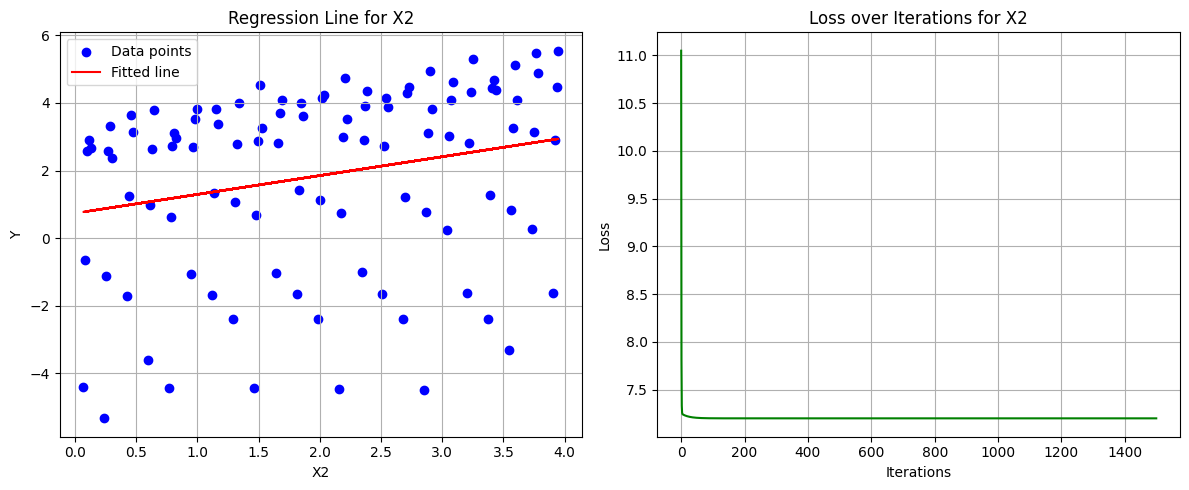

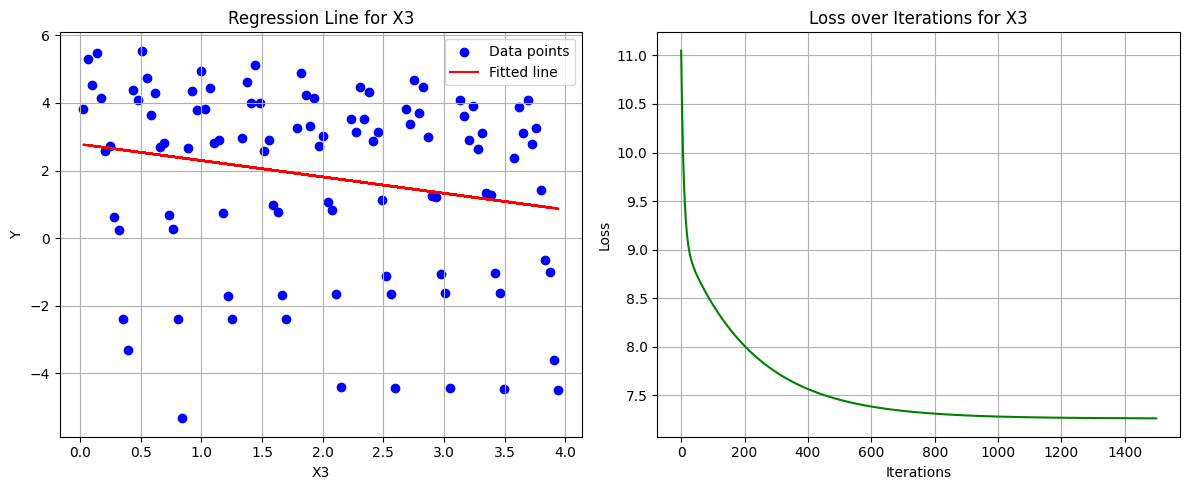

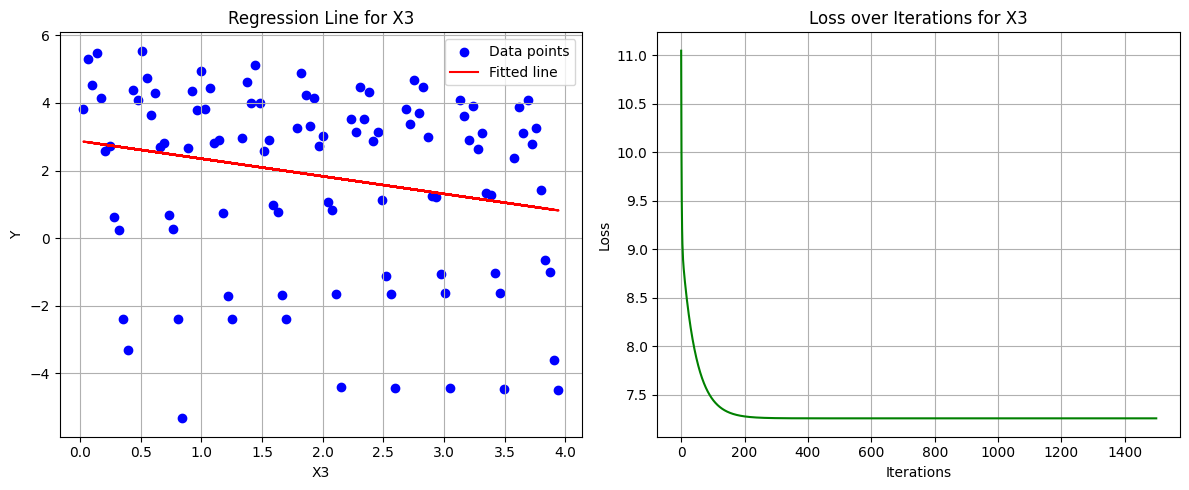

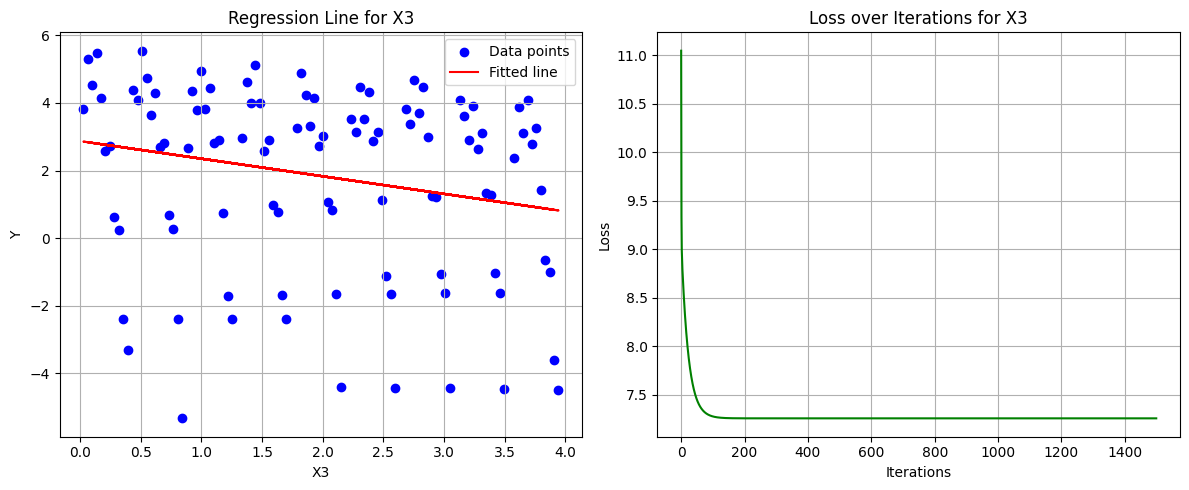

In [6]:
#We have three different variables X1, X2 and X3. We will run gradient descent for each of them
#Each variable will have a different learning rate (0.01, 0.05 and 0.1) so we will have three graphs

results_x1 = []
for lr in learning_rates:
    # Perform gradient descent for X1
    intercept, slope, loss_history = perform_gradient_descent(dataset['X1'], dataset['Y'], lr, iterations)
    results_x1.append((intercept, slope, loss_history, lr))
    plot_regression(dataset['X1'], dataset['Y'], intercept, slope, loss_history, 'X1')

results_x2 = []
for lr in learning_rates:
    # Perform gradient descent for X2
    intercept, slope, loss_history = perform_gradient_descent(dataset['X2'], dataset['Y'], lr, iterations)
    results_x2.append((intercept, slope, loss_history, lr))
    plot_regression(dataset['X2'], dataset['Y'], intercept, slope, loss_history, 'X2')

results_x3 = []
for lr in learning_rates:
    # Perform gradient descent for X3
    intercept, slope, loss_history = perform_gradient_descent(dataset['X3'], dataset['Y'], lr, iterations)
    results_x3.append((intercept, slope, loss_history, lr))
    plot_regression(dataset['X3'], dataset['Y'], intercept, slope, loss_history, 'X3')

In [7]:
# Find minimum loss for each variable at learning rate 0.01
min_loss_x1 = min(results_x1, key=lambda x: min(x[2]))[2][-1]  # Find the minimum loss from results_x1
min_loss_x2 = min(results_x2, key=lambda x: min(x[2]))[2][-1]  # Find the minimum loss from results_x2
min_loss_x3 = min(results_x3, key=lambda x: min(x[2]))[2][-1]  # Find the minimum loss from results_x3

# Print minimum losses
print("Minimum Loss for Each Variable at Learning Rate 0.01:")
print(f"X1: {min_loss_x1}")
print(f"X2: {min_loss_x2}")
print(f"X3: {min_loss_x3}")

Minimum Loss for Each Variable at Learning Rate 0.01:
X1: 1.9699861650811892
X2: 7.198732036336083
X3: 7.258902249215831


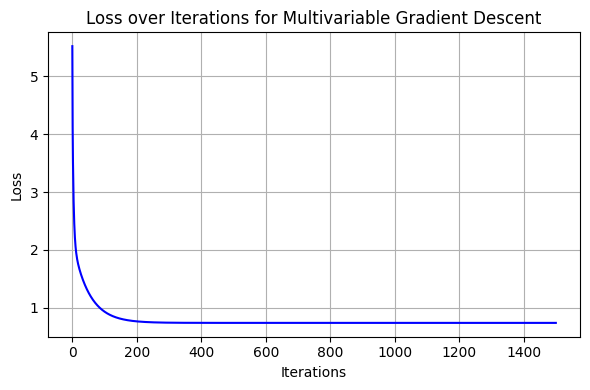

In [8]:
def multi_variable_gradient_descent(X, Y, learning_rate, iterations):
    """
    Perform gradient descent for multi-variable linear regression.

    Args:
    - X (array-like): Independent variable data.
    - Y (array-like): Dependent variable data.
    - learning_rate (float): Step size for gradient descent.
    - iterations (int): Number of iterations for gradient descent.

    Returns:
    - theta (array-like): Optimized parameters of the linear regression.
    - loss_history (list): List of loss values over iterations.
    """
    num_rows, num_cols = X.shape
    theta = np.zeros(num_cols + 1)  # Initialize parameters (including intercept)
    
    loss_history = []
    
    # Gradient descent loop
    for _ in range(iterations):
        predictions = np.dot(X, theta[1:]) + theta[0]
        loss = (1 / (2 * num_rows)) * np.sum(np.square(predictions - Y))
        loss_history.append(loss)
        
        # Compute gradients
        gradients = np.zeros(num_cols + 1)
        gradients[0] = np.sum(predictions - Y) / num_rows
        
        for j in range(1, num_cols + 1):
            gradients[j] = np.dot((predictions - Y), X[:, j-1]) / num_rows
        
        # Update parameters
        theta -= learning_rate * gradients
        
    return theta, loss_history

# Prepare data for multi-variable gradient descent
X_multi = dataset[['X1', 'X2', 'X3']].values
Y_multi = dataset['Y'].values

# Run multi-variable gradient descent for all variables combined
results_multi = []
for lr in learning_rates:
    theta, loss_history = multi_variable_gradient_descent(X_multi, Y_multi, learning_rate=lr, iterations=iterations)
    results_multi.append((theta, loss_history, lr))

# Plot the loss over iterations for multi-variable gradient descent
plt.figure(figsize=(6, 4))
plt.grid(True)
plt.plot(loss_history, color='blue')
plt.title('Loss over Iterations for Multivariable Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()

In [9]:
# Select the best model from results with LR = 0.05 (index 1)
best_theta = results_multi[1][0]

# Define new data points for prediction
new_data_points = np.array([[1, 1, 1],
                            [2, 0, 4],
                            [3, 2, 1]])

# Predict Y values for new data points
predictions = np.dot(new_data_points, best_theta[1:]) + best_theta[0]
print("Predicted Y values for new X values:")
print(predictions)

Predicted Y values for new X values:
[3.5758311  0.2439427  0.10224809]
